### What is AB Testing?
##### A/B testing is a way to compare two versions of a single variable, typically by testing a subject's response to variant against Control and determining which of them is more effective.

##### To check if introducing a new variable or entity and comparing both of them against each other to determine if it has a significant impact.


##### A firm wanted to increase the purchases, so they introduced a new red-colored button on the website. The Firm intends to test the efficiency of this alternative method, whether or not changing the color from green to red increases productivity.

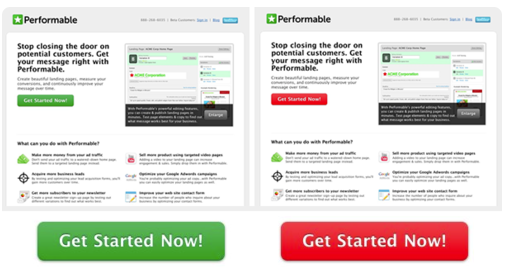

##### company decided to check this feature and justify with A/B test whether there is incerease in the purchases made by the customer.

###           A/B testing methodology

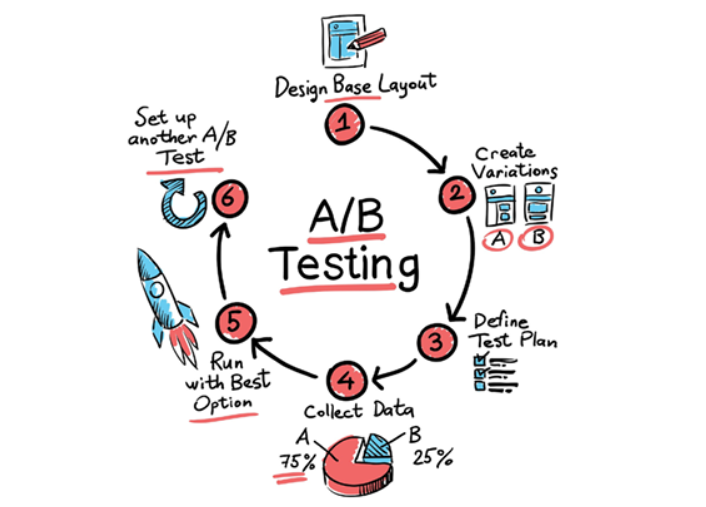

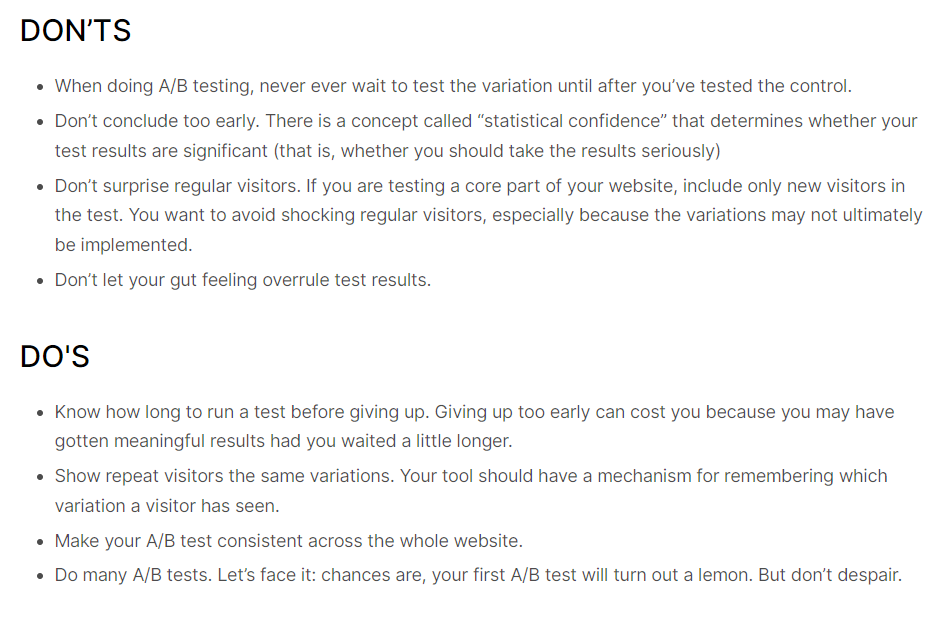

In [3]:
import pandas as pd

In [13]:
#loading the data
df_control_group = pd.read_excel("ab_testing.xlsx", sheet_name="Control Group")
df_control_group.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [5]:
# checking the mean of control group
df_control_group['Earning'].mean()

1908.5682998027492

In [6]:
#loading the data
df_test_group = pd.read_excel("ab_testing.xlsx", sheet_name="Test Group")
df_test_group.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [14]:
# checking the mean of test group
df_test_group['Earning'].mean()

2514.8907326506173

In [9]:
# calculate the percentage increase
increase_in_earnings = (df_test_group['Earning'].mean() - df_control_group['Earning'].mean()) / df_control_group['Earning'].mean() *100

In [12]:
print ('there has been %f percernt increase in the earnings' %(increase_in_earnings))

there has been 31.768443 percernt increase in the earnings


In [15]:
# deacribe and examining the dataframe and the variables
def check_df(dataframe):
    print(f"""
        ##################### Shape #####################\n\n\t{dataframe.shape}\n\n
        ##################### Types #####################\n\n{dataframe.dtypes}\n\n
        ##################### Head #####################\n\n{dataframe.head(3)}\n\n
        ##################### NA #####################\n\n{dataframe.isnull().sum()}\n\n
        ##################### Quantiles #####################\n\n{dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T}\n\n""")


In [5]:
#control
check_df(df_control_group)


        ##################### Shape #####################

	(40, 4)


        ##################### Types #####################

Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object


        ##################### Head #####################

     Impression        Click    Purchase      Earning
0  82529.459271  6090.077317  665.211255  2311.277143
1  98050.451926  3382.861786  315.084895  1742.806855
2  82696.023549  4167.965750  458.083738  1797.827447


        ##################### NA #####################

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64


        ##################### Quantiles #####################

                    0.00          0.05          0.50           0.95  \
Impression  45475.942965  79412.017920  99790.701078  132950.532455   
Click        2189.753157   3367.484257   5001.220602    7374.361202   
Purchase      267.028943    328.662425    531.206307     748.270761   
Earning 

In [6]:
# test
check_df(df_test_group)


        ##################### Shape #####################

	(40, 4)


        ##################### Types #####################

Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object


        ##################### Head #####################

      Impression        Click    Purchase      Earning
0  120103.503796  3216.547958  702.160346  1939.611243
1  134775.943363  3635.082422  834.054286  2929.405820
2  107806.620788  3057.143560  422.934258  2526.244877


        ##################### NA #####################

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64


        ##################### Quantiles #####################

                    0.00          0.05           0.50           0.95  \
Impression  79033.834921  83150.503777  119291.300775  153178.691063   
Click        1836.629861   2600.361018    3931.359804    5271.186906   
Purchase      311.629515    356.695400     551.355732     854.208945   


In [19]:
#importing visualization library
import matplotlib.pyplot as plt
import seaborn as sns

### CONTROL GROUP

### Plotting the KDE and Histogram plots

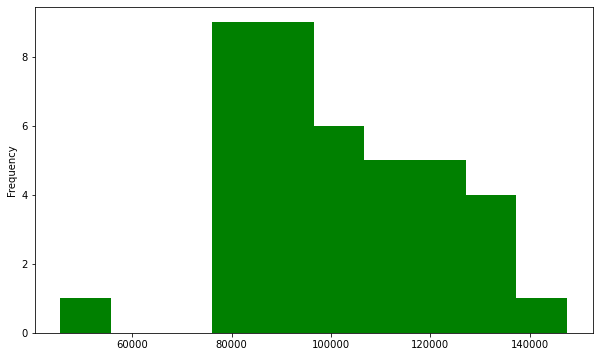

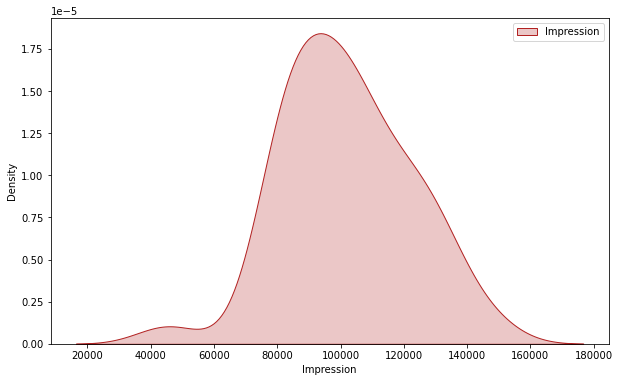

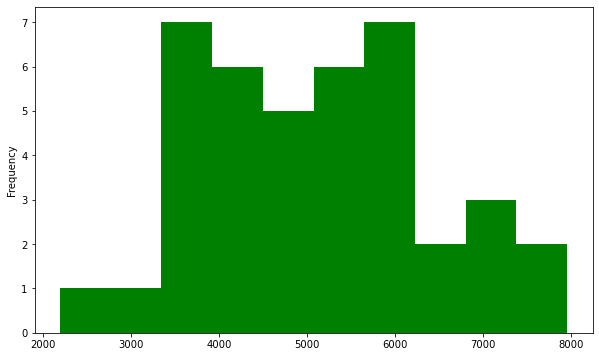

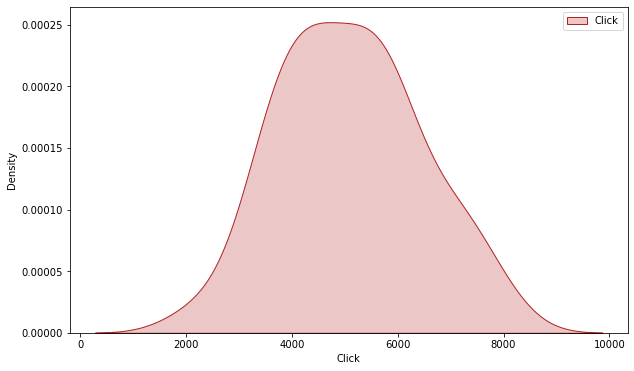

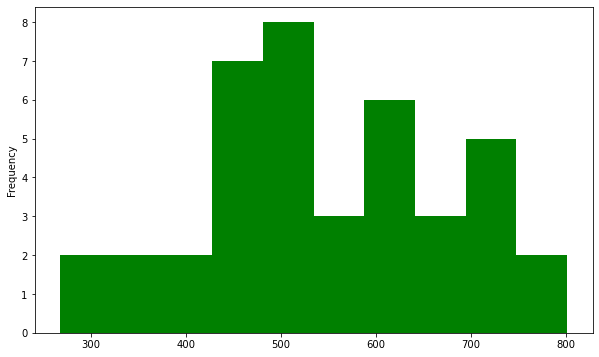

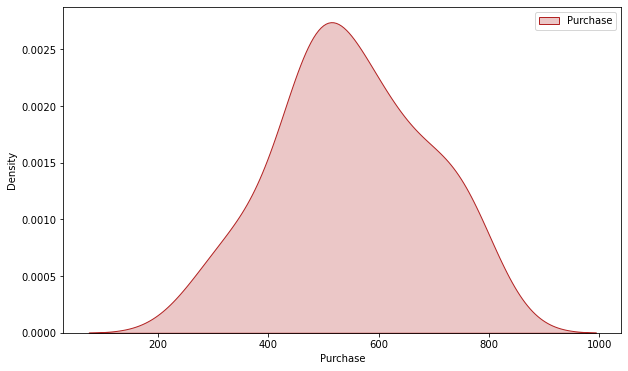

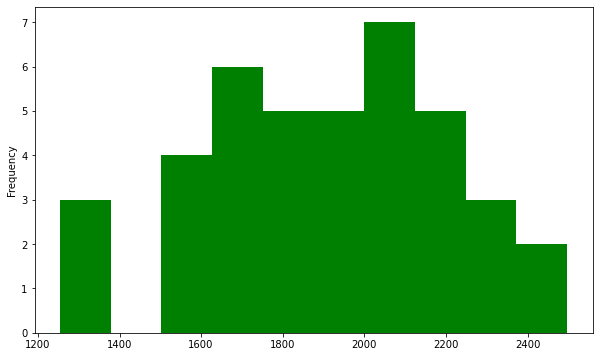

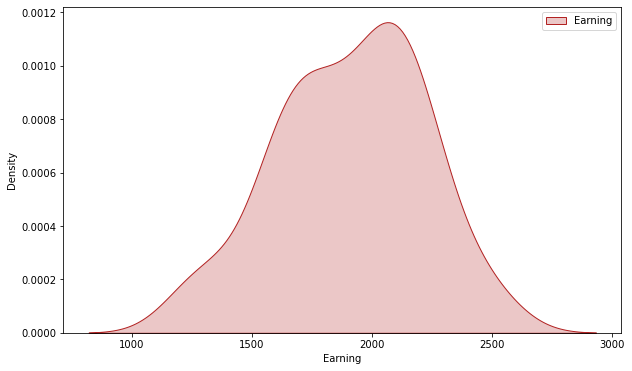

In [34]:
for i in df_control_group.columns:
    plt.figure(figsize=(10, 6))
    df_control_group[i].plot(kind = 'hist',color="g")
    plt.show()
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_control_group[i], label=i, shade = True, color = '#B22222')
    plt.legend()

### TEST GROUP

### Plotting the KDE and Histogram plots

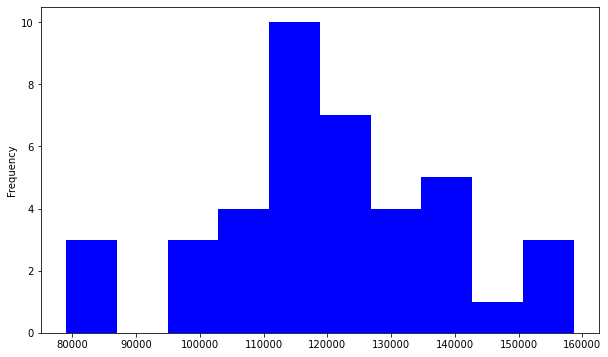

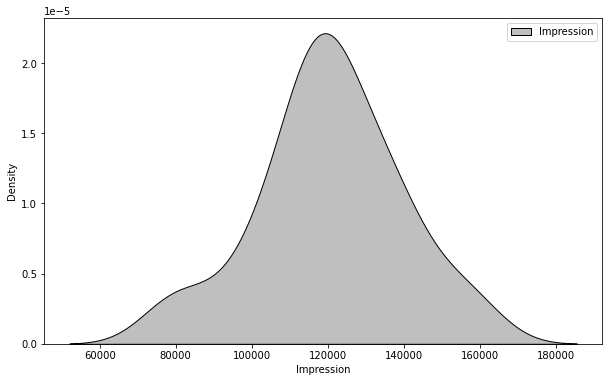

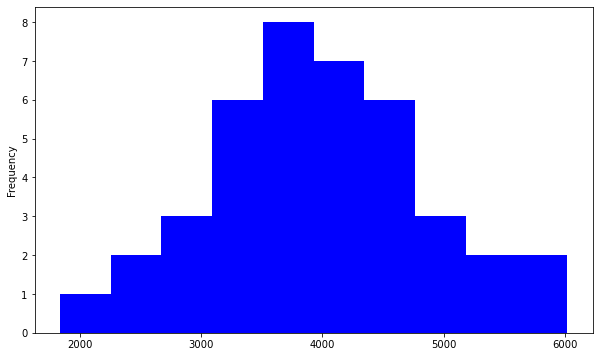

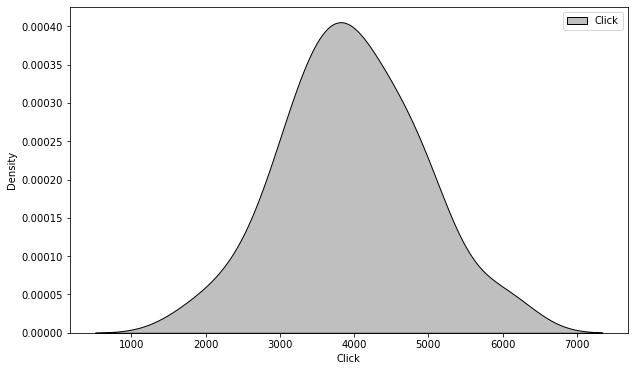

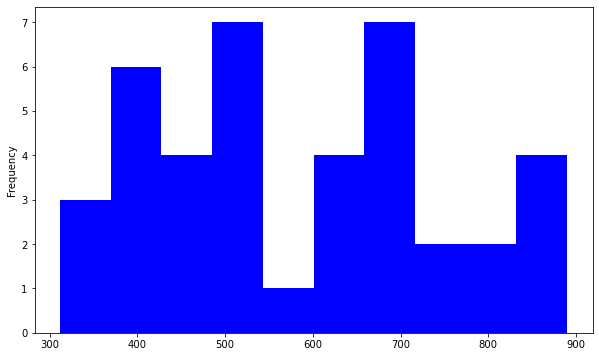

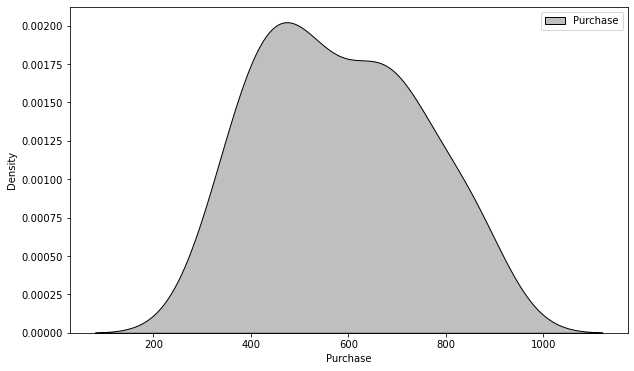

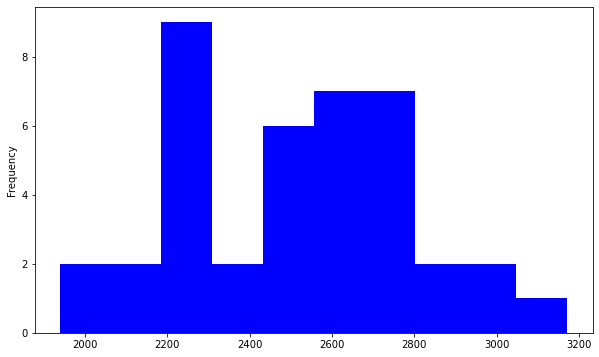

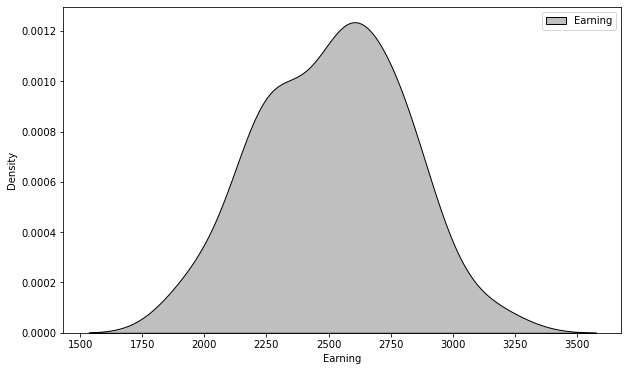

In [33]:
for i in df_test_group.columns:
    plt.figure(figsize=(10, 6))
    df_test_group[i].plot(kind = 'hist',color="b")
    plt.show()
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_test_group[i], label=i, shade = True, color = '#000000')
    plt.legend()

### NOTE = we are primarily checking 'purchases' because the number of purchases will only indicate increase the earnings. 

##### Number of purchase is the metric to measure the conversion by the client. As it is seen from the outputs above, there is a difference in number of puchases between two different bidding methods. Which difference is going to be checked whether it is statistically significant or not.

### Parametric vs Non-parametric

#### Parametric statistics are based on assumptions about the distribution of population from which the sample was taken. Nonparametric statistics are not based on assumptions, that is, the data can be collected from a sample that does not follow a specific distribution.

#### Common parametric statistics are, for example, the Student's t-tests. Common nonparametric statistics are, for example, the Mann-Whitney-Wilcoxon (MWW) test or the Wilcoxon test.

### A/B Testing (Independent two sample t-test)

##### Independent two sample t-test: It is used to compare the means of two different groups. Independent two sample t-test aims to prove the observed difference between means is statistically and significantly different. The analysis should start with (1) setting up the hypothesis and followed by (2) checking the assumptions and (3) interpretation of the p-value.

#### Hypothesis of the A/B Test
#### H0: µ1 = µ2
#### H1: µ1 != µ2

#### Assumptions
#### 1.Normality Assumption
#### 2.Variance Homogeneity

#### If these assumptions are fulfilled, independent two sample t-test (parametric test) should be implemented. Otherwise, mannwihtneyu test (non-parametric test) should be implemented.

### Normality Assumption (Shapiro Test)

#### Distributions of the data groups should be normally distributed. Outlier analsis is important to get normally distributed sample (sahpiro-wilks test). Shapiro-wilks test checks whether there is a statistical diffirence between standard normal distribution and distribution of the variable.

#### H0: Normal distribution assumption is provided.(p-value < 0.05)

#### H1: Normal distribution assumption not provided. (not p-value < 0.05)

In [10]:
from scipy.stats import shapiro,ttest_ind,levene
test_stat, pvalue = shapiro(df_control_group["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


H0 hypothesis could not be rejected because pvalue = 0.5891 > 0.05.

We see that the data in the control group has a normal distribution.

Because 0.05 is not greater than p value.


In [11]:
test_stat, pvalue = shapiro(df_test_group["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


H0 hypothesis could not be rejected because pvalue = 0.1541 > 0.05.

We see that the data in the test group has a normal distribution.

Because 0.05 is not greater than p value.

### Variance Homogeneity Assumption (Levene Test)

#### Levene test is used to cehck the variance homogeneity, it checks the homogeneity of the considered two samples, in other words it checks the similarity of the variances of the considered two samples.


#### H0: Variances are homogeneous. (p-value < 0.05)

#### H1: Variances are not homogeneous. (not p-value < 0.05)

In [73]:
test_stat, pvalue = levene(df_control_group["Purchase"], df_test_group["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


H0 hypothesis could be rejected because pvalue = 0.1083 > 0.05.

We see that the data in the test and control group have variances homogeneous.

Because 0.05 is not greater than p value.

### Parametric Independent Two-Sample T Test () -  because we are chosing one sample from each population of  control and test group

Hypothesis Testing

H0: There is no statistically significant difference between Maximum Bidding and Average Bidding (p-value < 0.05)

H1: There is a statistically significant difference between Maximum Bidding and Average Bidding (not p-value < 0.05)

In [75]:
test_stat, pvalue = ttest_ind(df_control_group["Purchase"], df_test_group["Purchase"], equal_var=True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


H0 hypothesis could not be rejected because pvalue = 0.3493 > 0.05.

We see that the data in the test group has a normal distribution.

Because 0.05 is not greater than p value.

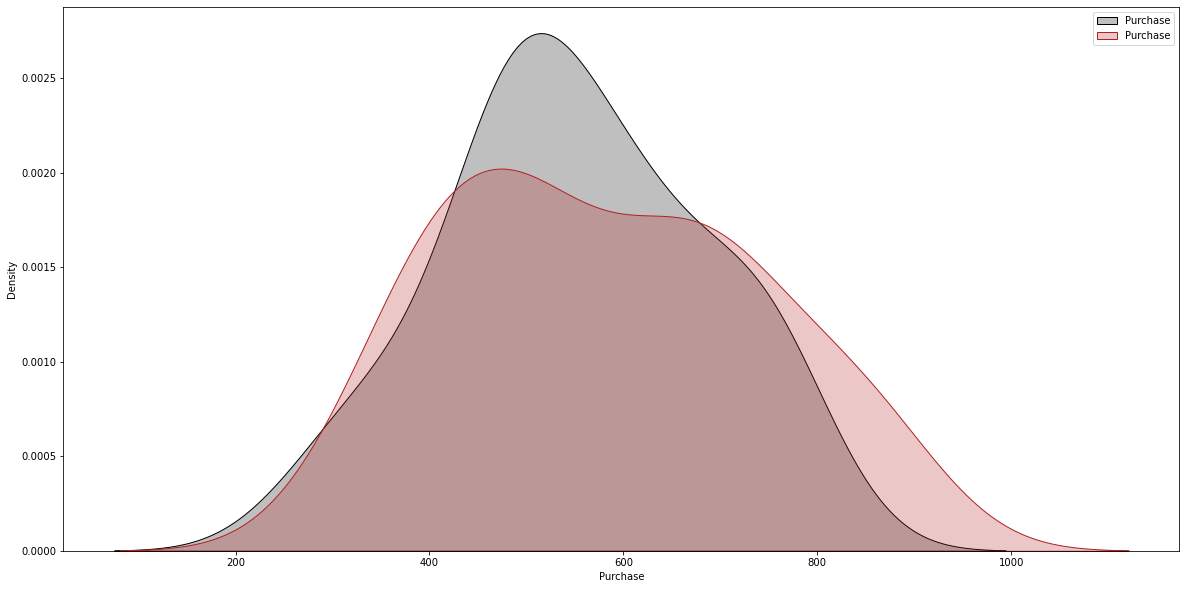

In [37]:
plt.figure(figsize=(20, 10))
sns.kdeplot(df_control_group['Purchase'], label="Purchase", shade = True, color = '#000000')
sns.kdeplot(df_test_group['Purchase'], label="Purchase", shade = True, color = '#B22222')
plt.legend()

#### After calculating the normality and homogeneity of variance, I decided to perform the Parametric Independent Two-Sample T-Test. The pvalue is greater than 0.05 in the last test, I observed that there is no statistically significant difference between the purchases made between two types of buttons.